In [1]:
import pandas as pd
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv('./data_all/dataset_completed')

In [3]:
df

,Unnamed: 0,movies,rank,audiCnt,showCnt,NationAtt,RatingAtt,openDt_season,openDt_peak,grade,p_breviews,n_breviews,breviews,p_reviews,n_reviews,reviews,audience_cnt
0,0,황금 나침반,1,161052,1682,1,3,3,1.0,9.01,245,63,308,34,49,83,2906958
1,1,내셔널 트레져:비밀의 책,2,123779,1168,1,0,3,1.0,9.06,124,33,157,54,11,65,1745669
2,2,기다리다 미쳐,3,73572,1553,0,1,3,1.0,8.48,0,0,0,26,24,50,441337
3,3,색즉시공 시즌2,4,61740,811,0,2,3,1.0,6.58,104,92,196,15,17,32,2002423
4,4,P.S. 아이 러브 유,6,49842,1061,1,1,3,1.0,9.93,27,1,28,15,6,21,315558
5,5,어거스트 러쉬,9,47398,476,1,3,2,2.0,9.38,434,70,504,0,0,0,2227459
6,6,꿀벌대소동,1,52845,1089,1,3,3,1.0,9.02,129,27,156,22,5,27,1238064
7,7,우리 생애 최고의 순간,1,108071,2042,0,3,3,1.0,9.30,454,67,521,145,31,176,4018872
8,8,무방비도시,2,81244,1774,0,1,3,1.0,10.00,4,0,4,81,61,142,1600856
9,9,미스트,3,38391,1100,1,1,3,1.0,8.83,111,30,141,49,78,127,521299


In [4]:
del df['Unnamed: 0']

In [5]:
df.set_index('movies',inplace=True)

In [6]:
df

,rank,audiCnt,showCnt,NationAtt,RatingAtt,openDt_season,openDt_peak,grade,p_breviews,n_breviews,breviews,p_reviews,n_reviews,reviews,audience_cnt
movies,,,,,,,,,,,,,,,
황금 나침반,1,161052,1682,1,3,3,1.0,9.01,245,63,308,34,49,83,2906958
내셔널 트레져:비밀의 책,2,123779,1168,1,0,3,1.0,9.06,124,33,157,54,11,65,1745669
기다리다 미쳐,3,73572,1553,0,1,3,1.0,8.48,0,0,0,26,24,50,441337
색즉시공 시즌2,4,61740,811,0,2,3,1.0,6.58,104,92,196,15,17,32,2002423
P.S. 아이 러브 유,6,49842,1061,1,1,3,1.0,9.93,27,1,28,15,6,21,315558
어거스트 러쉬,9,47398,476,1,3,2,2.0,9.38,434,70,504,0,0,0,2227459
꿀벌대소동,1,52845,1089,1,3,3,1.0,9.02,129,27,156,22,5,27,1238064
우리 생애 최고의 순간,1,108071,2042,0,3,3,1.0,9.30,454,67,521,145,31,176,4018872
무방비도시,2,81244,1774,0,1,3,1.0,10.00,4,0,4,81,61,142,1600856


In [7]:
X = df[ df.columns[0:14] ]
X.head()

,rank,audiCnt,showCnt,NationAtt,RatingAtt,openDt_season,openDt_peak,grade,p_breviews,n_breviews,breviews,p_reviews,n_reviews,reviews
movies,,,,,,,,,,,,,,
황금 나침반,1,161052,1682,1,3,3,1.0,9.01,245,63,308,34,49,83
내셔널 트레져:비밀의 책,2,123779,1168,1,0,3,1.0,9.06,124,33,157,54,11,65
기다리다 미쳐,3,73572,1553,0,1,3,1.0,8.48,0,0,0,26,24,50
색즉시공 시즌2,4,61740,811,0,2,3,1.0,6.58,104,92,196,15,17,32
P.S. 아이 러브 유,6,49842,1061,1,1,3,1.0,9.93,27,1,28,15,6,21


In [8]:
y = df['audience_cnt']
y.head()

movies
황금 나침반           2906958
내셔널 트레져:비밀의 책    1745669
기다리다 미쳐           441337
색즉시공 시즌2         2002423
P.S. 아이 러브 유      315558
Name: audience_cnt, dtype: int64

In [9]:
def func(x) :
    if 3000000 > int(x) :
        return 1
   
    if 3000000 <= int(x) < 5000000 :
        return 2
     
    if 5000000 <= int(x):
        return 3

In [10]:
y = y.apply(func)

In [11]:
X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=.2 )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(697, 14) (175, 14) (697,) (175,)


In [12]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
col = X.columns
for i in range(len(X.columns)):
    print(col[i],clf.feature_importances_[i])

rank 0.040968758770216246
audiCnt 0.09560046777345059
showCnt 0.08464591361848499
NationAtt 0.014376109097797844
RatingAtt 0.023179284705790032
openDt_season 0.02402054396693495
openDt_peak 0.020703669078223234
grade 0.0700578796013578
p_breviews 0.1071533153947966
n_breviews 0.07827566535796839
breviews 0.09285453365201793
p_reviews 0.1329794553444873
n_reviews 0.08618723873815126
reviews 0.12899716490032295


In [14]:
pre = clf.predict(X_test)
acSore = metrics.accuracy_score(y_test,pre)
acSore

0.8971428571428571

In [15]:
print(metrics.classification_report(y_test, pre))

              precision    recall  f1-score   support

           1       0.91      0.99      0.95       149
           2       0.50      0.10      0.17        10
           3       0.75      0.56      0.64        16

   micro avg       0.90      0.90      0.90       175
   macro avg       0.72      0.55      0.59       175
weighted avg       0.87      0.90      0.88       175



In [16]:
y.value_counts()

1    732
3     73
2     67
Name: audience_cnt, dtype: int64

In [17]:
x = np.array(pre)
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  1 161]
 [  2   2]
 [  3  12]]


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

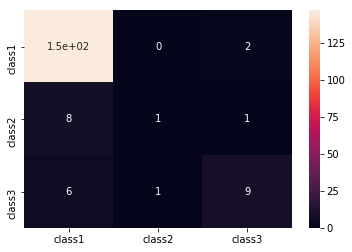

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = pd.DataFrame(confusion_matrix(y_test, pre), columns=['class1','class2','class3'], index=['class1','class2','class3'])
sns.heatmap(cm, annot=True)

In [20]:
from sklearn.externals import joblib
import pickle
pickle.dumps(clf)
joblib.dump(clf, 'clf_2.pkl') 

['clf_2.pkl']